In [ ]:
import pandas as pd
import networkx as nx

grouped_df = pd.read_csv('/content/credit_card.csv')

In [ ]:
columns_to_drop = ['TX_TIME_SECONDS', 'TX_FRAUD_SCENARIO', 'TX_DURING_WEEKEND', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
grouped_df_dropped = grouped_df.drop(columns=columns_to_drop)

In [ ]:
grouped_df_dropped.to_csv('/content/credit_card_2.csv', index=False)

In [ ]:
import pandas as pd

# CSV 파일 읽기
file_path = '/content/credit_card.csv'
df = pd.read_csv(file_path)

# TX_FRAUD 값에 따라 데이터를 나누기
fraud_df = df[df['TX_FRAUD'] >= 1]
non_fraud_df = df[df['TX_FRAUD'] < 1]

# 동일한 CUSTOMER_ID를 가진 데이터 합치기
fraud_grouped = fraud_df.groupby('CUSTOMER_ID').sum()
non_fraud_grouped = non_fraud_df.groupby('CUSTOMER_ID').sum()

# 결과를 파일로 저장
fraud_grouped.to_csv('fraud_transactions.csv', index=False)
non_fraud_grouped.to_csv('non_fraud_transactions.csv', index=False)

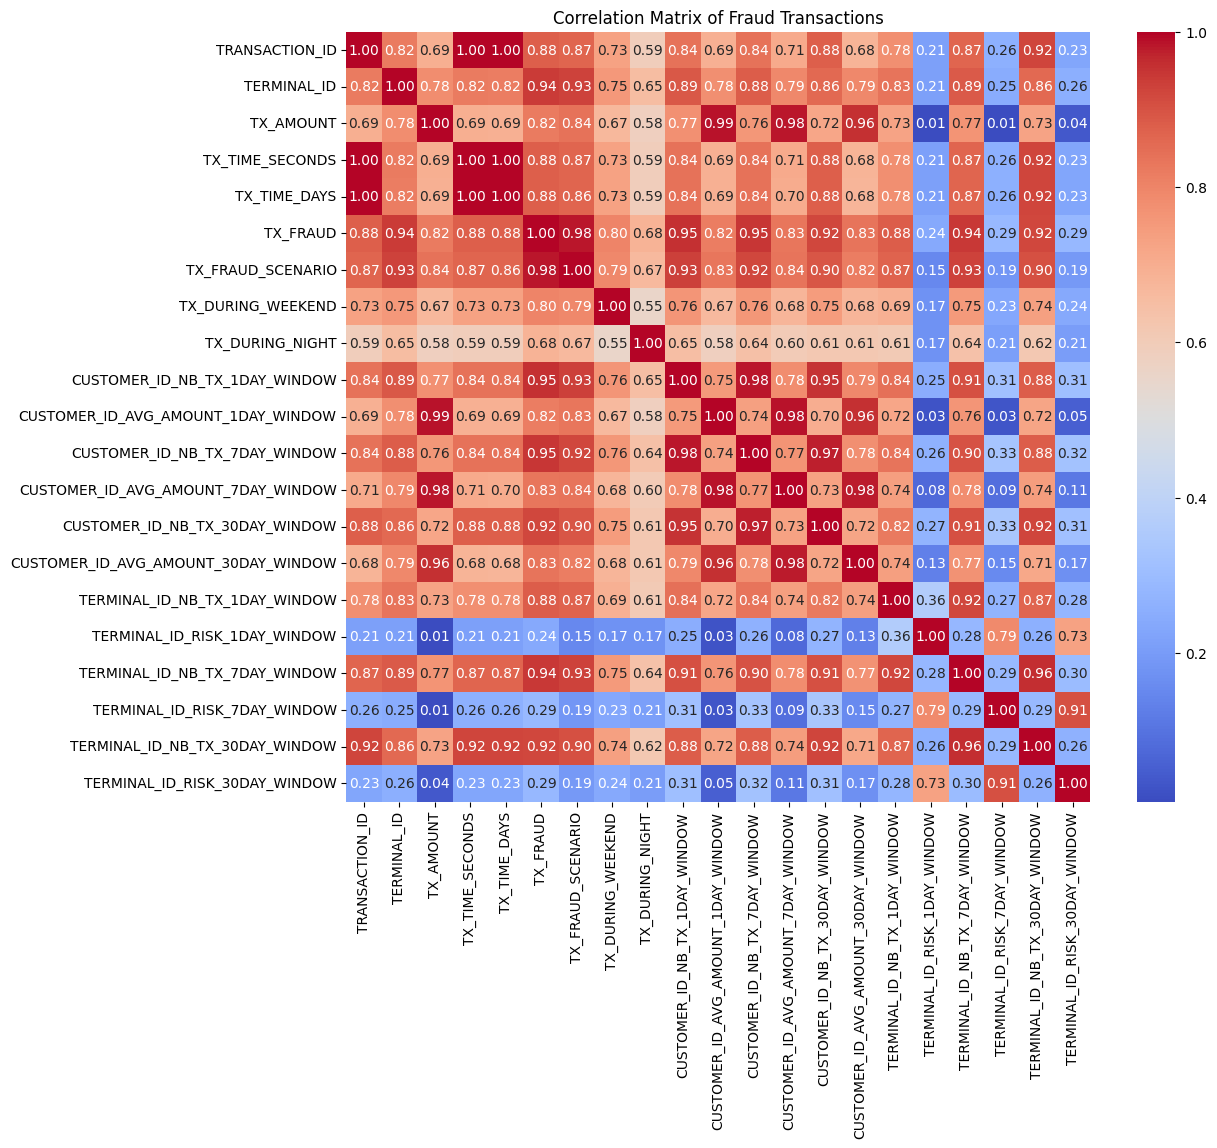

In [ ]:
#변수들 간 상관관계 파악
import pandas as pd

# CSV 파일 읽기
fraud_transactions = pd.read_csv('fraud_transactions.csv')

# 'TX_DATETIME' 열 제거
fraud_transactions = fraud_transactions.drop(columns=['TX_DATETIME'])

import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
corr_matrix = fraud_transactions.corr()

# 상관 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Fraud Transactions')
plt.show()


In [ ]:
#상관계수를 이용한 계층 구분 방법
#1. 변수 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
#변수들 간 상관관계 파악
import pandas as pd

# CSV 파일 읽기
non_fraud_transactions = pd.read_csv('non_fraud_transactions.csv')

# 'TX_DATETIME' 열 제거
non_fraud_transactions = non_fraud_transactions.drop(columns=['TX_DATETIME'])

# 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_fraud_transactions)


In [ ]:
#2. 주성분 분석
from sklearn.decomposition import PCA

# 주성분 분석
pca = PCA(n_components=2)  # 주요 성분 2개 추출 (시각화를 위해 2차원으로 축소)
pca_result = pca.fit_transform(scaled_data)


In [ ]:
#3. 클러스터링
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters=10, random_state=0)  # 10개의 클러스터로 나눔
clusters = kmeans.fit_predict(pca_result)

# 클러스터링 결과를 원래 데이터프레임에 추가
non_fraud_transactions['Cluster'] = clusters
non_fraud_transactions.to_csv(f'/content/non_fraud_transactions_Clustered.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


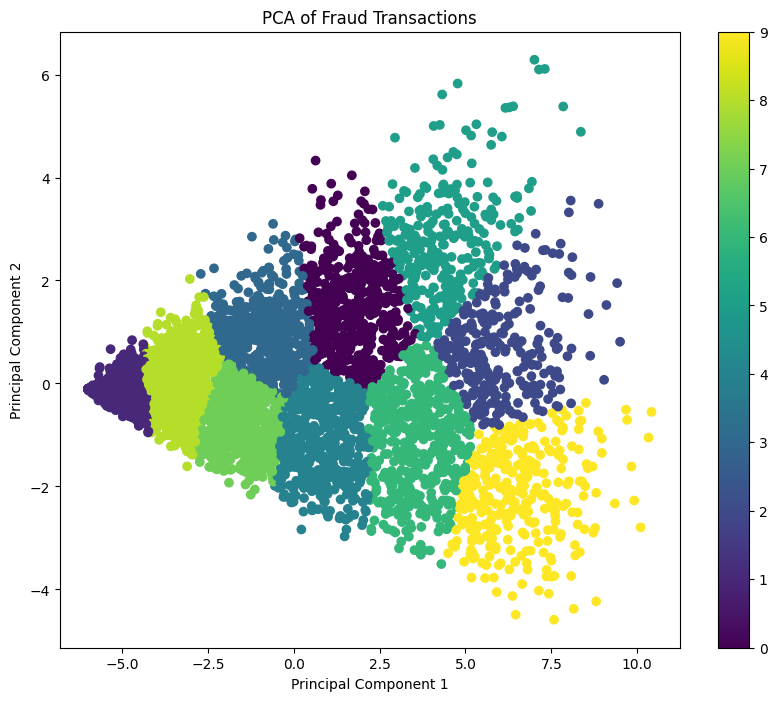

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fraud Transactions')
plt.colorbar()
plt.show()


In [ ]:
import os
# 각 클러스터를 별도의 파일로 저장
output_dir = 'clusters'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i in range(10):
    cluster_data = non_fraud_transactions[non_fraud_transactions['Cluster'] == i]
    cluster_data.to_csv(f'{output_dir}/cluster_{i}.csv', index=False)
    print(f"Cluster {i}:\n", cluster_data.head())


Cluster 0:
     TRANSACTION_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  \
7        167402439    1634592.0    9760.47     1.507612e+09       17290.0   
8        115759146    1217177.0    1672.81     1.042572e+09       11944.0   
20       130509199    1594030.0    3096.75     1.175477e+09       13467.0   
22       135548198    1234636.0    9549.45     1.220694e+09       13990.0   
53       151200820    1533933.0    2183.22     1.361803e+09       15614.0   

    TX_FRAUD  TX_FRAUD_SCENARIO  TX_DURING_WEEKEND  TX_DURING_NIGHT  \
7        0.0                0.0               96.0             57.0   
8        0.0                0.0               79.0             44.0   
20       0.0                0.0               73.0             61.0   
22       0.0                0.0               72.0             41.0   
53       0.0                0.0               87.0             67.0   

    CUSTOMER_ID_NB_TX_1DAY_WINDOW  ...  CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW  \
7                   